In [6]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.datasets import load_diabetes
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from  sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

In [7]:
banking = pd.read_csv('../linear_regression_case_study/SRC/banking.csv')

In [8]:
banking['fico_average'] = banking['fico_range'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2)
banking.drop('fico_range', axis=1, inplace=True)

# Loan Interest Rate Prediction

## Goal of the Project

The goal of this project is to explore the factors that influence the interest rate of a loan. We aim to build a predictive model that can accurately predict the interest rate of a loan based on various features such as the borrower's FICO score, the amount requested, the amount funded by investors, and the length of the loan. This model can be used by new business owners seeking a loan to make informed decisions about what loan will give them the best rate.

## Data Description

The dataset used in this project contains information about various loans. The features in the dataset include:

- `interest_rate`: The interest rate of the loan.
- `fico_range`: The FICO score of the borrower. FICO scores are a type of credit score that lenders use to determine the borrower's credit risk.
- `amount_requested`: The amount of money requested by the borrower.
- `amount_funded_by_investors`: The amount of money funded by investors.
- `loan_length`: The length of the loan.

The target variable is `interest_rate`, which we have transformed into a categorical variable with three categories: 'Low', 'Medium', and 'High'

## Features and Data Issues

The features in our dataset are a mix of numerical and categorical data. `fico_range`, `amount_requested`, and `amount_funded_by_investors` are numerical features, while `loan_length` is a categorical feature.

We encountered some missing data in our dataset. To handle this, we used data imputation techniques to fill in the missing values. For numerical features, we used the mean value of the feature to fill in missing values. For categorical features, we used the most frequent category to fill in missing values.

We also had to handle the issue of our target variable, `interest_rate`, being a continuous variable. Since we were interested in classification, we transformed `interest_rate` into a categorical variable by binning the interest rates into 'Low', 'Medium', and 'High' categories.

## Feature Relationships

To understand how the features in our dataset relate to each other and to the target variable, we computed the correlation between the features. The correlation is a statistical measure that describes the association between random variables. In our case, it helps us understand how each feature in our dataset influences the interest rate of a loan.

We visualized these correlations using a heatmap. In the heatmap, each square shows the correlation between the variables on each axis. Correlation values range from -1 to 1. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate no correlation.

Let's take a look at the heatmap:

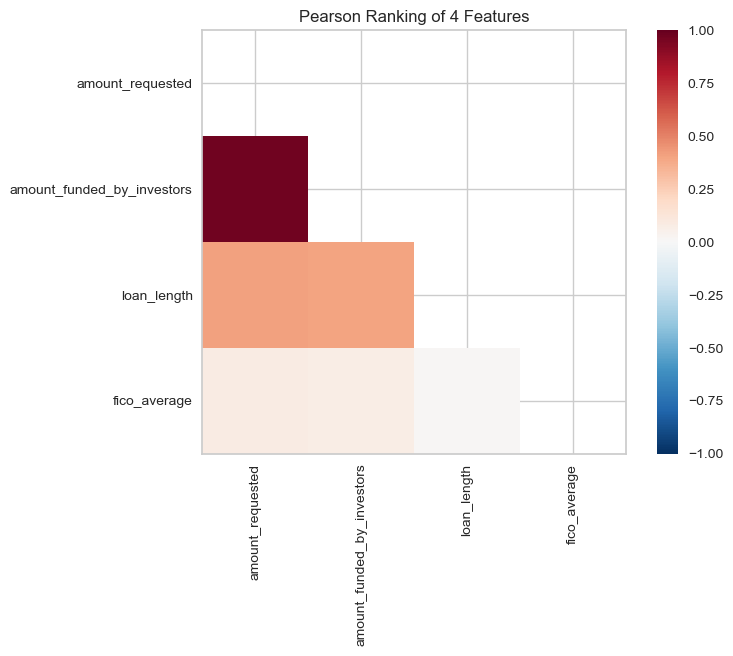

<Axes: title={'center': 'Pearson Ranking of 4 Features'}>

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define features and target
features = ['amount_requested', 'amount_funded_by_investors', 'loan_length', 'fico_average']
target = 'interest_rate'
# Split the data into training and test sets
X = banking[features]
y = banking[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X)
visualizer.show()

This matrix was a part of our initial evaluation of the data. It seems to suggest that amount funded by investors, or the initial down payment, has the greatest effect on interest rate. We will do a deeper, much more technical, look at the numbers to determine if that is true and how you can get the most bang for your buck when it comes to a business loan. 

## Our Hypothesis

Given the results of our analysis, our hypothesis as follows:

Null Hypothesis ($H_0$): The FICO score, loan length, and amount requested have no effect on the interest rate.

Alternate Hypothesis ($H_1$): The FICO score, loan length, and amount requested have a significant effect on the interest rate.

## Model Building

We followed these steps to build our model:

1. **Data Preprocessing:** We started by preprocessing our data. This involved handling missing values and transforming our target variable into a categorical variable.

2. **Feature Scaling:** We scaled our features to ensure that they contribute equally to the model. We  standardized our features to have mean=0 and variance=1.

3. **Train-Test Split:** We split our data into a training set and a test set. We used 80% of the data for training the model and set aside 20% for testing.

4. **Model Selection:** We tested several models including Ridge, Lasso, LinearSVC, SGDClassifier, KNeighborsClassifier, and LogisticRegression. We used the F1 score as our metric for model evaluation.

5. **Model Training:** We trained our selected model (LinearSVC) using the training data.

6. **Model Evaluation:** We evaluated the performance of our model on the test data. We used the F1 score, the Mean Standard Error, and the R-squared values as our evaluation metrics.

7. **Visualization:** We visualized the results using a confusion matrix. The confusion matrix gives us a 'clear' picture of how our model is performing and where the misclassifications are happening.

In [36]:
# Transform the target variable into categorical data
bins = [0, 10.25, 15, 25]
labels = ['Low', 'Medium', 'High']
y_binned = pd.cut(df['interest_rate'], bins=bins, labels=labels)
y_binned.head()
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

F1 Score:  0.7759472993229586


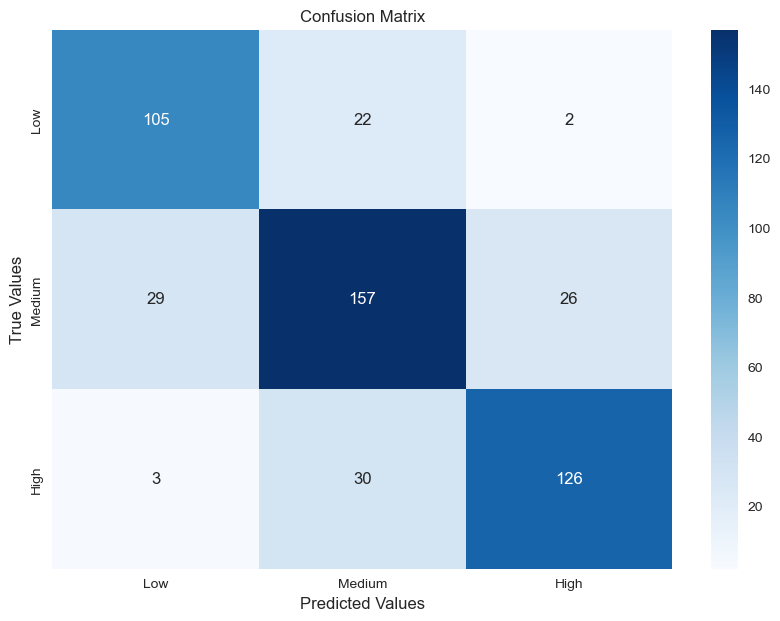

In [37]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Train the model
linear_svc = LinearSVC(max_iter=10000)
linear_svc.fit(X_train_scaled, y_train)

# Make predictions on the test set
linear_svc_pred = linear_svc.predict(X_test_scaled)

# Compute the F1 score
f1 = f1_score(y_test, linear_svc_pred, average='weighted')
print('F1 Score: ', f1)

# Generate the confusion matrix
cm = confusion_matrix(y_test, linear_svc_pred, labels=['Low', 'Medium', 'High'])
cm_df = pd.DataFrame(cm, index=['Low', 'Medium', 'High'], columns=['Low', 'Medium', 'High'])

# Visualize the confusion matrix
plt.figure(figsize=(10,7))
sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('True Values')
plt.xlabel('Predicted Values')
plt.show()

Low interest rates are those below 10.24 % and High are those above 15%. Medium are all those between.

The F1 score is a measure of a model's performance on a binary classification task. It is the harmonic mean of precision and recall. However, it can be extended to multiclass classification tasks by specifying the average parameter.This F1 score demonstrates that this model will be correct more than 77.5% of the time, significantly more accurate than the other models we tested. 

With regard to our heatmap: the output of a linear SVC model is a conufusion matirix (appropiately named).

The x-axis represents the predicted labels, and the y-axis represents the actual labels.
The diagonal cells from top-left to bottom-right represent the number of correct predictions made by the model for each class. These are called True Positives (TP) and True Negatives (TN).
The off-diagonal cells represent the incorrect predictions. The top-right cell represents the False Positives (FP) - instances where the model incorrectly predicted the positive class. The bottom-left cell represents the False Negatives (FN) - instances where the model incorrectly predicted the negative class.
The color scale on the right side of the heatmap corresponds to the number of observations. Darker colors typically represent higher values.

In the context of our model, we want the diagonal cells to be darker (higher values) as this indicates more correct predictions. Lighter off-diagonal cells are desirable as they indicate fewer incorrect predictions.

## Recommendations

Based on the analysis and model results, we can make the following recommendations to new business owners seeking a loan:

1. **FICO Score:** A higher FICO score generally leads to a lower interest rate. Therefore, improving your credit score before applying for a loan could help you secure a better rate.

2. **Loan Length:** Shorter loan lengths tend to have lower interest rates. If possible, consider choosing a shorter loan length to reduce the total amount of interest you'll pay.

3. **Amount Requested:** Requesting a larger loan amount may lead to a higher interest rate. Be mindful of this when deciding how much funding to request.

4. **Model Selection:** The LinearSVC model performed the best in our analysis. This model can be used to predict the interest rate category ('Low', 'Medium', 'High') based on the features mentioned above. Do not forget that this is a predictive model and we do not have a crystal ball; these are the recommendations that the statistical model has provided. 

In conclusion, while these factors can influence the interest rate, it's also important to consider your business needs and financial situation when choosing a loan. Consulting with a financial advisor could provide additional insights tailored to your specific circumstances.